In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# read csv
trash_df_read = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')
trash_df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [3]:
trash_df_read.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [4]:
# find out total missed pickups based on Description Column
# trash_df_missed_total = trash_df_read[trash_df_read['Description'].str.contains('missed| miss|not pick', case=False, na=True)]
# trash_df_missed_total.info()
# trash_df_missed_total.head()


In [5]:
# How much does each trash hauler owe?

In [6]:
trash_haulers =  trash_df_read["Trash Hauler"].unique().tolist() 
trash_haulers

['RED RIVER', 'WASTE IND', 'METRO', nan, 'Metro']

In [7]:
# find out total missed pickups based on Request Column
#trash_df_missed_total = trash_df_read[trash_df_read['Request']!= "Damage to Property"]

trash_df_missed_total = trash_df_read[trash_df_read["Request"].isin(["Trash - Backdoor",
 "Trash - Curbside/Alley Missed Pickup",
 "Trash Collection Complaint"])]
trash_df_missed_total.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [8]:
# Assign values to the variables
missed_pickup = 1
fine_amount = 200

## RED RIVER

In [10]:
# Filter missed for RED RIVER
trash_df_missed_red_river = trash_df_missed_total[trash_df_missed_total["Trash Hauler"]=="RED RIVER"]
trash_df_missed_red_river

# Filter missed count for RED RIVER
trash_df_missed_red_river_count = trash_df_missed_red_river["Request"].value_counts()
print(trash_df_missed_red_river_count)
trash_df_missed_red_river_count.sum()

Request
Trash - Curbside/Alley Missed Pickup    10715
Trash - Backdoor                         2196
Trash Collection Complaint               1287
Name: count, dtype: int64


14198

In [11]:
# Filter on address count for Red River - Total rows 9975, 2292 rows of address >1
trash_df_missed_red_river_address_count = trash_df_missed_red_river["Incident Address"].value_counts().reset_index()
trash_df_missed_red_river_address_count = (trash_df_missed_red_river_address_count[trash_df_missed_red_river_address_count["count"] >1])
trash_df_missed_red_river_address_count

,Incident Address,count
0,3710 N NATCHEZ CT,19
1,"12546 Old Hickory Blvd, Nashville, TN 37013, U...",19
2,"6007 Obrien Ave, Nashville, TN 37209, United S...",18
3,5135 Hickory Hollow Pkwy,18
4,"802 Crescent Rd, Nashville, TN 37205, United S...",17
...,...,...
2287,"711 Greymont Dr, Nashville, TN 37217, United S...",2
2288,308 ROSEBANK AVE,2
2289,2902 brick church pike,2
2290,901 buford pl,2


In [12]:
trash_df_missed_red_river_address_count["fine_count"] = (trash_df_missed_red_river_address_count["count"] - missed_pickup).clip(lower=0)
trash_df_missed_red_river_address_count["fine_total"] = trash_df_missed_red_river_address_count["fine_count"] * fine_amount
trash_df_missed_red_river_address_count

,Incident Address,count,fine_count,fine_total
0,3710 N NATCHEZ CT,19,18,3600
1,"12546 Old Hickory Blvd, Nashville, TN 37013, U...",19,18,3600
2,"6007 Obrien Ave, Nashville, TN 37209, United S...",18,17,3400
3,5135 Hickory Hollow Pkwy,18,17,3400
4,"802 Crescent Rd, Nashville, TN 37205, United S...",17,16,3200
...,...,...,...,...
2287,"711 Greymont Dr, Nashville, TN 37217, United S...",2,1,200
2288,308 ROSEBANK AVE,2,1,200
2289,2902 brick church pike,2,1,200
2290,901 buford pl,2,1,200


In [13]:
red_river = trash_df_missed_red_river_address_count.sum()
print(red_river)

Incident Address    3710 N NATCHEZ CT12546 Old Hickory Blvd, Nashv...
count                                                            6514
fine_count                                                       4222
fine_total                                                     844400
dtype: object


In [14]:
# red_river total pickups 
red_river_total_count = len(trash_df_missed_red_river)
print("total_count",red_river_total_count)

#red river missed pickup count
red_river_fine_count = red_river["fine_count"]
print("fine_count", red_river_fine_count)

# red_river total fine
red_river_fine_total = red_river["fine_total"]
print("fine_amount $",red_river_fine_total)

total_count 14198
fine_count 4222
fine_amount $ 844400


## WASTE IND

In [16]:
# Filter missed for WASTE IND
trash_df_missed_waste_ind = trash_df_missed_total[trash_df_missed_total["Trash Hauler"]=="WASTE IND"]
trash_df_missed_waste_ind

# Filter missed count for WASTE IND
trash_df_missed_waste_ind_count = trash_df_missed_waste_ind["Request"].value_counts()
trash_df_missed_waste_ind_count

Request
Trash - Curbside/Alley Missed Pickup    1019
Trash Collection Complaint               233
Trash - Backdoor                          82
Name: count, dtype: int64

In [17]:
# Filter on address count for Waste Ind
trash_df_missed_waste_ind_address_count = trash_df_missed_waste_ind["Incident Address"].value_counts().reset_index()
trash_df_missed_waste_ind_address_count = (trash_df_missed_waste_ind_address_count[trash_df_missed_waste_ind_address_count["count"] >1])
trash_df_missed_waste_ind_address_count["fine_count"] = (trash_df_missed_waste_ind_address_count["count"] - missed_pickup).clip(lower=0)
trash_df_missed_waste_ind_address_count["fine_total"] = trash_df_missed_waste_ind_address_count["fine_count"] * fine_amount
trash_df_missed_waste_ind_address_count

,Incident Address,count,fine_count,fine_total
0,"613 Troy Ct, Nashville, TN 37207, United States",9,8,1600
1,"3406 Batavia St, Nashville, TN 37209, United S...",9,8,1600
2,518 monroe st,8,7,1400
3,1011 elm hill pike,7,6,1200
4,"80 Lyle Ln, Nashville, TN 37210, United States",7,6,1200
...,...,...,...,...
214,313 Polk Ave,2,1,200
215,"312 Oriel Ave, Nashville, TN 37210, United States",2,1,200
216,"4004 Alameda St, Nashville, TN 37209, United S...",2,1,200
217,"2318 Foster Ave, Nashville, TN 37210, United S...",2,1,200


In [18]:
waste_ind = trash_df_missed_waste_ind_address_count.sum()
print(waste_ind)

Incident Address    613 Troy Ct, Nashville, TN 37207, United State...
count                                                             566
fine_count                                                        347
fine_total                                                      69400
dtype: object


In [19]:
# waste_ind total pickups 
waste_ind_total_count = len(trash_df_missed_waste_ind)
print("total_count",waste_ind_total_count)

# waste_ind missed pickup count
waste_ind_fine_count = waste_ind["fine_count"]
print("fine_count", waste_ind_fine_count)

# waste_ind total fine
waste_ind_fine_total = waste_ind["fine_total"]
print("fine_total $",waste_ind_fine_total)

total_count 1334
fine_count 347
fine_total $ 69400


## METRO/ Metro

In [21]:
# Filter missed for METRO
trash_df_missed_metro = trash_df_missed_total[trash_df_missed_total["Trash Hauler"].isin(["METRO","Metro"])]
trash_df_missed_metro

# Filter missed count for METRO
trash_df_missed_metro_count = trash_df_missed_metro["Request"].value_counts()
trash_df_missed_metro_count

Request
Trash - Curbside/Alley Missed Pickup    2688
Trash Collection Complaint               618
Trash - Backdoor                         241
Name: count, dtype: int64

In [22]:
# Filter on address count for Metro
trash_df_missed_metro_address_count = trash_df_missed_metro["Incident Address"].value_counts().reset_index()
trash_df_missed_metro_address_count = (trash_df_missed_metro_address_count[trash_df_missed_metro_address_count["count"] >1])
trash_df_missed_metro_address_count["fine_count"] = (trash_df_missed_metro_address_count["count"] - missed_pickup).clip(lower=0)
trash_df_missed_metro_address_count["fine_total"] = trash_df_missed_metro_address_count["fine_count"] * fine_amount
trash_df_missed_metro_address_count

,Incident Address,count,fine_count,fine_total
0,"1816 Jo Johnston Ave, Nashville, TN 37203, Uni...",16,15,3000
1,"1804 28th Ave N, Nashville, TN 37208, United S...",12,11,2200
2,1402 Lillian St,11,10,2000
3,1818 28th ave n,10,9,1800
4,110 George L Davis Blvd,10,9,1800
...,...,...,...,...
548,"2226 Grantland Ave, Nashville, TN 37204, Unite...",2,1,200
549,1401 montgomery ave,2,1,200
550,1317 N 6th St,2,1,200
551,400 E Nocturne Dr,2,1,200


In [23]:
metro = trash_df_missed_metro_address_count.sum()
print(metro)

Incident Address    1816 Jo Johnston Ave, Nashville, TN 37203, Uni...
count                                                            1531
fine_count                                                        978
fine_total                                                     195600
dtype: object


In [24]:
# metro total pickups 
metro_total_count = len(trash_df_missed_metro)
print("total_count",metro_total_count)

# metro missed pickup count
metro_fine_count = metro["fine_count"]
print("fine_count", metro_fine_count)

# metro total fine
metro_fine_total = metro["fine_total"]
print("fine_total $",metro_fine_total)

total_count 3547
fine_count 978
fine_total $ 195600


# BLANK OR NO HAULER MENTIONED

In [26]:
# Filter missed for BLANK (nan)
trash_df_missed_blank = trash_df_missed_total[trash_df_missed_total["Trash Hauler"].isna()]
trash_df_missed_blank

# Filter missed count for BLANK
trash_df_missed_blank_count = trash_df_missed_blank["Request"].value_counts()
print(trash_df_missed_blank_count)
trash_df_missed_blank_count.sum()

Request
Trash - Curbside/Alley Missed Pickup    606
Trash Collection Complaint              174
Trash - Backdoor                        110
Name: count, dtype: int64


890

In [51]:
# Filter on address count for blank values (nan)
trash_df_missed_blank_address_count = trash_df_missed_blank["Incident Address"].value_counts().reset_index()
trash_df_missed_blank_address_count = (trash_df_missed_blank_address_count[trash_df_missed_blank_address_count["count"] >1])
trash_df_missed_blank_address_count["fine_count"] = (trash_df_missed_blank_address_count["count"] - missed_pickup).clip(lower=0)
trash_df_missed_blank_address_count["fine_total"] = trash_df_missed_blank_address_count["fine_count"] * fine_amount
trash_df_missed_blank_address_count

,Incident Address,count,fine_count,fine_total
0,"215 6th Ave N, Nashville, TN 37219, United States",14,13,2600
1,"Granbery Park Dr, Nashville, TN 37027, United ...",6,5,1000
2,"906 Free Silver Rd, Nashville, TN 37207, Unite...",5,4,800
3,"110 George L Davis Blvd, Nashville, TN 37203, ...",5,4,800
4,110 George L Davis Blvd,4,3,600
5,4049 Moss Rd.,4,3,600
6,3505 Mays St,3,2,400
7,"750 S 5th St, Nashville, TN 37206, United States",3,2,400
8,613 James Ave,3,2,400
9,"601 OLD HICKORY BLVD, 37209",3,2,400


In [47]:
blank = trash_df_missed_blank_address_count.sum()
print(blank)

Incident Address    215 6th Ave N, Nashville, TN 37219, United Sta...
count                                                             140
fine_count                                                         88
fine_total                                                      17600
dtype: object


In [37]:
# blank total pickups 
blank_total_count = len(trash_df_missed_blank)
print("total_count",blank_total_count)

# metro missed pickup count
blank_fine_count = blank["fine_count"]
print("fine_count", blank_fine_count)

# metro total fine
blank_fine_total = blank["fine_total"]
print("fine_total $",blank_fine_total)

total_count 890
fine_count 88
fine_total $ 17600


## ALL HAULERS

In [30]:
# find out total missed pickups based on Request Column for All Haulers
trash_df_missed_total_per_request_count = trash_df_missed_total["Request"].value_counts()
trash_df_missed_total_per_request_count

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Name: count, dtype: int64

In [31]:
# Filter on address count for All
trash_df_missed_total_address_count = trash_df_missed_total["Incident Address"].value_counts().reset_index()
trash_df_missed_total_address_count = (trash_df_missed_total_address_count[trash_df_missed_total_address_count["count"] >1])
trash_df_missed_total_address_count

,Incident Address,count
0,5135 Hickory Hollow Pkwy,21
1,3710 N NATCHEZ CT,20
2,"12546 Old Hickory Blvd, Nashville, TN 37013, U...",19
3,"6007 Obrien Ave, Nashville, TN 37209, United S...",19
4,"802 Crescent Rd, Nashville, TN 37205, United S...",18
...,...,...
3249,1807 Lillian St,2
3250,3513 Hewlett Dr,2
3251,"6541 Cornwall Dr, Nashville, TN 37205, United ...",2
3252,3625 Woodmont Blvd,2


In [32]:
# Filter on address count for All
trash_df_missed_total_address_count["fine_count"] = (trash_df_missed_total_address_count["count"]-missed_pickup).clip(lower=0)
trash_df_missed_total_address_count["fine_total"] = trash_df_missed_total_address_count["fine_count"]*fine_amount
all_haulers = trash_df_missed_total_address_count.sum()
print(all_haulers)

Incident Address    5135 Hickory Hollow Pkwy3710 N NATCHEZ CT12546...
count                                                            9278
fine_count                                                       6024
fine_total                                                    1204800
dtype: object


In [33]:
#all_haulers_total_count = all_haulers["count"]
all_haulers_total_count = len(trash_df_missed_total)
print("total_count",all_haulers_total_count)
all_haulers_fine_count = all_haulers["fine_count"]
print("fine_count",all_haulers_fine_count)
all_haulers_fine_total = all_haulers["fine_total"]
print("fine_total",all_haulers_fine_total)

total_count 19969
fine_count 6024
fine_total 1204800


## How much does each trash hauler owe?    

In [69]:
# All the haulers and total
results = pd.DataFrame({
"Hauler" : ["Red River", "Waste Ind", "Metro", "Blank", "All Haulers"],
"Total_count" : [red_river_total_count, waste_ind_total_count, metro_total_count, blank_total_count, all_haulers_total_count],
"missed_more_than_once" : [red_river_fine_count, waste_ind_fine_count, metro_fine_count, blank_fine_count, all_haulers_fine_count],
"Fine_total":[red_river_fine_total, waste_ind_fine_total, metro_fine_total, blank_fine_total, all_haulers_fine_total],
"Missed_percentage": [(red_river_fine_count/red_river_total_count)*100, 
                      (waste_ind_fine_count/waste_ind_total_count)*100,
                      (metro_fine_count/metro_total_count)*100,
                      (blank_fine_count/blank_total_count)*100,
                       (all_haulers_fine_count/all_haulers_total_count)*100]
})
print(results)        

        Hauler  Total_count  missed_more_than_once  Fine_total  \
0    Red River        14198                   4222      844400   
1    Waste Ind         1334                    347       69400   
2        Metro         3547                    978      195600   
3        Blank          890                     88       17600   
4  All Haulers        19969                   6024     1204800   

   Missed_percentage  
0          29.736583  
1          26.011994  
2          27.572597  
3           9.887640  
4          30.166758  


In [79]:
# All the haulers and total
results_haulers = pd.DataFrame({
"Hauler" : ["Red River", "Waste Ind", "Metro", "Blank"],
"Total_count" : [red_river_total_count, waste_ind_total_count, metro_total_count, blank_total_count],
"missed_more_than_once" : [red_river_fine_count, waste_ind_fine_count, metro_fine_count, blank_fine_count],
"Fine_total":[red_river_fine_total, waste_ind_fine_total, metro_fine_total, blank_fine_total],
"Missed_percentage": [(red_river_fine_count/red_river_total_count)*100, 
                      (waste_ind_fine_count/waste_ind_total_count)*100,
                      (metro_fine_count/metro_total_count)*100,
                      (blank_fine_count/blank_total_count)*100]
})
print(results_haulers)     

      Hauler  Total_count  missed_more_than_once  Fine_total  \
0  Red River        14198                   4222      844400   
1  Waste Ind         1334                    347       69400   
2      Metro         3547                    978      195600   
3      Blank          890                     88       17600   

   Missed_percentage  
0          29.736583  
1          26.011994  
2          27.572597  
3           9.887640  


## How do metro crews compare to the contractor's performance?

Ans: Metro crew's performance is better than Red River, however Waste Ind performance is better than metro.

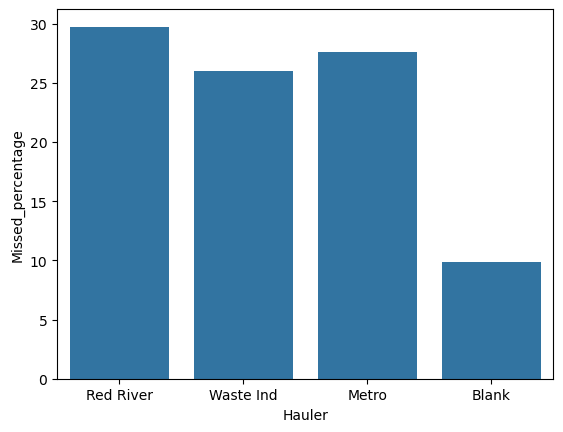

In [81]:
sns.barplot(data = results_haulers, x="Hauler", y="Missed_percentage")
plt.show()

In [ ]:
# Refer different notebook in the same folder:

# ⦁	Are there any geospatial analysis you can do?  Which visualizations can you create?

# ⦁	What were to total missed pickup by route?